In [8]:
import os
import sys

# Add the project root directory to the Python path
# This allows the notebook to find the 'src' folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Now you can import your custom data loader [cite: 20]
from src.data_loader import load_and_preprocess_data

# Set visual style for plots
sns.set_theme(style="whitegrid")

# Load data using your project's pipeline
X_train, X_test, y_train, y_test = load_and_preprocess_data()
df = pd.concat([X_train, y_train], axis=1)

print(f"Exploration ready with {df.shape[0]} observations.")



--- 1. Loading Data ---
Dataset loaded with 321 rows and 19 columns.
--- 2. Preprocessing and Splitting Data ---
Train set size: 256 samples.
Test set size: 65 samples.
Exploration ready with 256 observations.


In [9]:
# Display summary statistics
print("--- Summary Statistics ---")
df = pd.concat([X_train, y_train], axis=1)
display(df.describe())

# Check for missing values to ensure data quality [cite: 1]
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Summary Statistics ---


,nbh,cbd,inst,linst,dist,ldist,linstsq,price
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,2.109375,15875.000000,16449.218750,9.489194,20823.437500,9.843512,90.614598,96815.085938
std,2.128184,8959.166628,9003.994722,0.756324,8509.583842,0.477013,13.749317,43013.069536
min,0.000000,1000.000000,1000.000000,6.907800,5000.000000,8.517193,47.717705,26000.000000
25%,0.000000,9750.000000,9000.000000,9.105000,13750.000000,9.528774,82.901016,65375.000000
50%,2.000000,14000.000000,16000.000000,9.680300,19800.000000,9.893437,93.708206,86000.000000
75%,4.000000,23000.000000,24000.000000,10.086000,27825.000000,10.233687,101.727402,121375.000000
max,6.000000,35000.000000,34000.000000,10.434000,40000.000000,10.596630,108.868355,300000.000000



--- Missing Values ---
nbh        0
cbd        0
inst       0
linst      0
dist       0
ldist      0
linstsq    0
price      0
dtype: int64


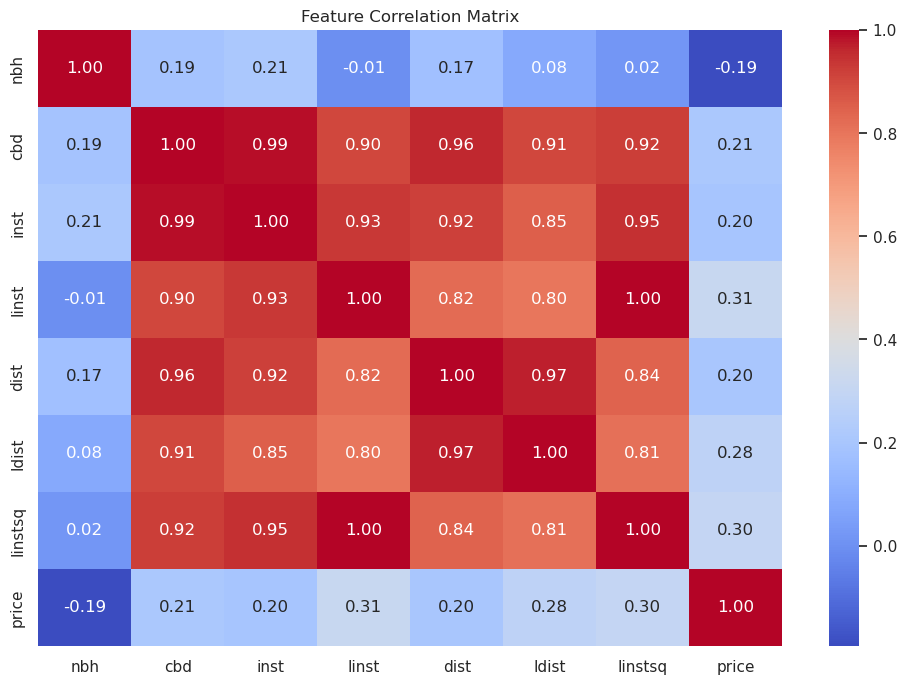


Correlation of features with Price:
price      1.000000
linst      0.310127
linstsq    0.299937
ldist      0.276289
cbd        0.209104
dist       0.201962
inst       0.197250
nbh       -0.193551
Name: price, dtype: float64


In [10]:
# Compute correlation matrix to identify multicollinearity risks
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Focus on correlations with the price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation of features with Price:")
print(price_corr)

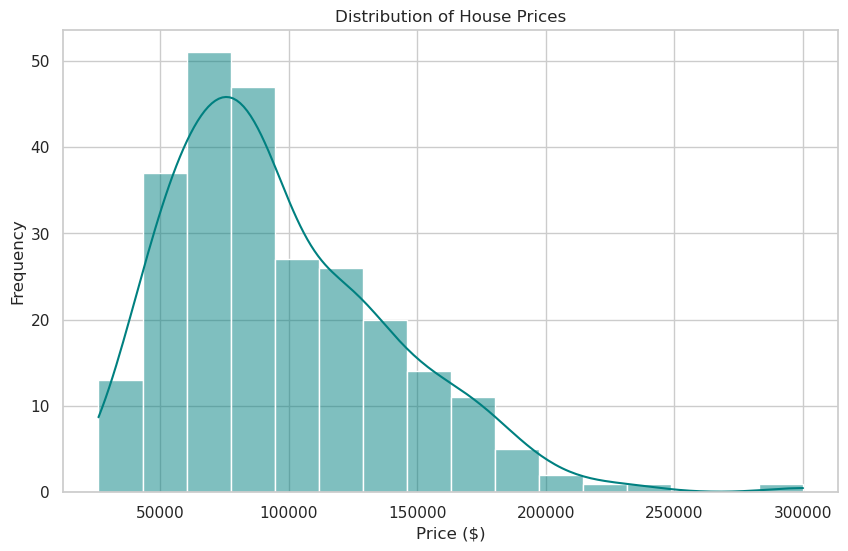

In [11]:
# Visualize the distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='teal')
plt.title("Distribution of House Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

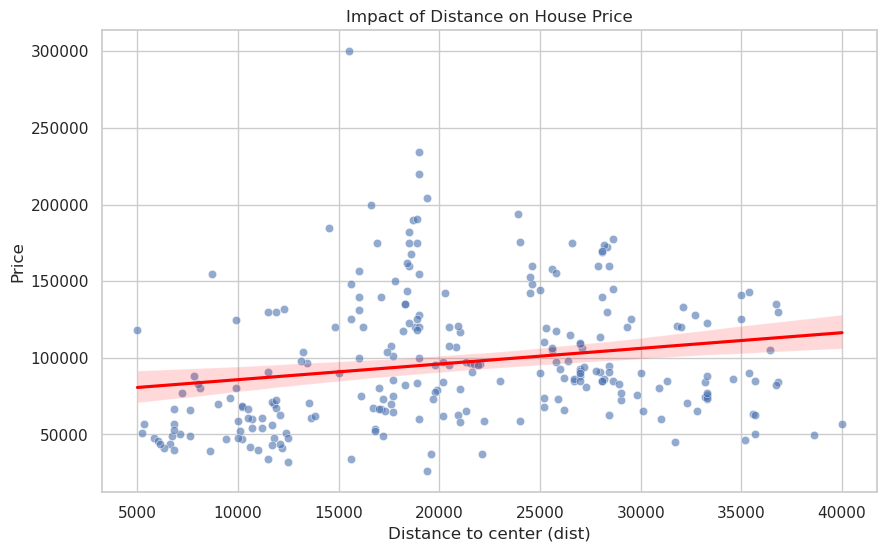

In [12]:
# Analyzing the relationship between distance (dist) and Price [cite: 11]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist', y='price', alpha=0.6)
sns.regplot(data=df, x='dist', y='price', scatter=False, color='red')
plt.title("Impact of Distance on House Price")
plt.xlabel("Distance to center (dist)")
plt.ylabel("Price")
plt.show()